In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("rent.csv")
df

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200791,pre2013_126116,20040925,2004,yountville,yountville,napa,1850,2.0,NaN,NaN,0,NaN,NaN,NaN,$1850 / 2br - Yountville - LARGE townhouse in ...,NaN,NaN
200792,pre2013_162529,20060221,2006,yountville,yountville,napa,1950,2.0,NaN,NaN,0,NaN,NaN,NaN,$1950 / 2br - Yountville duplex,NaN,NaN
200793,pre2013_65092,20120402,2012,yountville,yountville,napa,2600,2.0,2.0,1300.0,0,NaN,NaN,NaN,$2600 / 2br - 1300ft² - Fully furnished two be...,NaN,NaN
200794,pre2013_57294,20120307,2012,yountville,yountville,napa,1900,2.0,NaN,1000.0,0,NaN,NaN,NaN,$1900 / 2br - 1000ft² - Charming Old Town Youn...,NaN,NaN


In [3]:
df = df.dropna()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from plotnine import *
from sklearn.feature_extraction.text import CountVectorizer

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler,OneHotEncoder, PolynomialFeatures, SplineTransformer #Z-score variables, Polynomial
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [5]:
df

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
515,4710888130,20141012,2014,alameda,alameda,alameda,2250,2.0,1.0,1080.0,0,659,37.772835,-122.248585,2br Victortian Duplex Garden Apt.,"This 1903 ""Workingman's Victorian"" on a quiet ...","2BR / 1Ba 1080ft2 apartment date=""2014-11-02""..."
714,4988581576,20150421,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,"Upgraded 2B w/ Pool View, Short Walk to School...",Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-04-20"" ..."
959,4988561264,20150421,2015,alameda,alameda,alameda,1950,2.0,1.0,800.0,0,2105,37.773228,-122.266480,"BRAND NEW REMODELED 2-BR / 1-BA END-UNIT, SUNNY",Be the first to live in this freshly remodeled...,"2BR / 1Ba 800ft2 apartment date=""2015-04-21"" ..."
1034,4855533017,20150120,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,Fully Upgraded and lovely Unit Close to School...,Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-01-20"" ..."
1118,4631188738,20140824,2014,alameda,alameda,alameda,3295,4.0,1.0,1716.0,0,1116,37.732229,-122.234879,Originally 4-bedroom Townhouse in Bay Farm Island,"3546 Magnolia Dr., Alameda, CAA peaceful and c...","3BR / 2.5Ba 1716ft2 apartment date=""2014-09-0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200285,5943507344,20170112,2017,willow glen / cambrian,cambrian,santa clara,2725,2.0,2.0,1182.0,0,2498,37.290680,-121.874400,Fabulous Newer w/ Pd. Utilities | 4 wk Free ...,Willow Glen This is a GREAT time of year to ge...,"2BR / 2Ba1182ft2 data-date=""2017-01-01"" data-t..."
200337,6480256605,20180201,2018,willow glen / cambrian,cambrian,santa clara,4300,4.0,2.5,1691.0,0,2795,37.329220,-121.895800,For Rent - 4 bed 2.5 bathrooms - Great school ...,"Apartment walking distance to VTA Light Rail, ...","<p class=""attrgroup"">""shared-line-bubble"">1BR ..."
200346,5955718625,20170112,2017,willow glen / cambrian,cambrian,santa clara,2990,3.0,2.0,1360.0,0,2638,37.310240,-121.897500,short term rental $2990/monthly,"near downtown Willow Glen, 3 bedrooms, 1 & 1/2...","3BR / 1Ba1360ft2 data-date=""2017-09-01"" data-t..."
200378,4834909852,20150106,2015,willow glen / cambrian,cambrian,santa clara,1825,1.0,1.0,720.0,0,1804,37.307320,-121.913500,"Spacious 1 Bed, Everything is New, Granite, Mi...",Willow Glen Apartments996 Meridian AveSan Jose...,"1BR / 1Ba 720ft2 apartment date=""2015-01-06"" ..."


In [6]:
predictors = ['date', 'year', 'nhood','city','county', 'beds','baths','sqft','room_in_apt','address','lat','lon','title','descr']
y = df['price']
X = df[predictors]


In [7]:
df['title_length'] = df['title'].apply(len)
df['descr_length'] = df['descr'].apply(len)

In [8]:
df

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details,title_length,descr_length
515,4710888130,20141012,2014,alameda,alameda,alameda,2250,2.0,1.0,1080.0,0,659,37.772835,-122.248585,2br Victortian Duplex Garden Apt.,"This 1903 ""Workingman's Victorian"" on a quiet ...","2BR / 1Ba 1080ft2 apartment date=""2014-11-02""...",33,801
714,4988581576,20150421,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,"Upgraded 2B w/ Pool View, Short Walk to School...",Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-04-20"" ...",62,1610
959,4988561264,20150421,2015,alameda,alameda,alameda,1950,2.0,1.0,800.0,0,2105,37.773228,-122.266480,"BRAND NEW REMODELED 2-BR / 1-BA END-UNIT, SUNNY",Be the first to live in this freshly remodeled...,"2BR / 1Ba 800ft2 apartment date=""2015-04-21"" ...",47,764
1034,4855533017,20150120,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,Fully Upgraded and lovely Unit Close to School...,Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-01-20"" ...",62,1769
1118,4631188738,20140824,2014,alameda,alameda,alameda,3295,4.0,1.0,1716.0,0,1116,37.732229,-122.234879,Originally 4-bedroom Townhouse in Bay Farm Island,"3546 Magnolia Dr., Alameda, CAA peaceful and c...","3BR / 2.5Ba 1716ft2 apartment date=""2014-09-0...",49,1746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200285,5943507344,20170112,2017,willow glen / cambrian,cambrian,santa clara,2725,2.0,2.0,1182.0,0,2498,37.290680,-121.874400,Fabulous Newer w/ Pd. Utilities | 4 wk Free ...,Willow Glen This is a GREAT time of year to ge...,"2BR / 2Ba1182ft2 data-date=""2017-01-01"" data-t...",69,1902
200337,6480256605,20180201,2018,willow glen / cambrian,cambrian,santa clara,4300,4.0,2.5,1691.0,0,2795,37.329220,-121.895800,For Rent - 4 bed 2.5 bathrooms - Great school ...,"Apartment walking distance to VTA Light Rail, ...","<p class=""attrgroup"">""shared-line-bubble"">1BR ...",54,722
200346,5955718625,20170112,2017,willow glen / cambrian,cambrian,santa clara,2990,3.0,2.0,1360.0,0,2638,37.310240,-121.897500,short term rental $2990/monthly,"near downtown Willow Glen, 3 bedrooms, 1 & 1/2...","3BR / 1Ba1360ft2 data-date=""2017-09-01"" data-t...",31,109
200378,4834909852,20150106,2015,willow glen / cambrian,cambrian,santa clara,1825,1.0,1.0,720.0,0,1804,37.307320,-121.913500,"Spacious 1 Bed, Everything is New, Granite, Mi...",Willow Glen Apartments996 Meridian AveSan Jose...,"1BR / 1Ba 720ft2 apartment date=""2015-01-06"" ...",65,1352


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryanj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def sentenceSegment(text):
    sentences = []
    start = 0

    for i in range(len(text)):
        if text[i] == '.' or text[i] == '!' or text[i] == '?':
            sentences.append(text[start:i+1].strip())
            start = i + 1

    return sentences

In [11]:
import string
def remove_punctuation(input_string):
    # Define a string of punctuation marks and symbols
    punctuations = string.punctuation
    
    # Remove the punctuation marks and symbols from the input string
    output_string = "".join(char for char in input_string if char not in punctuations)
    
    return output_string

In [12]:
def convertToLower(s):
  return s.lower()

In [13]:
def tokenize(s):
  words = [] #token words should be stored here
  i = 0
  word = ""
  while(i <len(s)):
    if (s[i] != " "):
      word = word+s[i]
    else:
        words.append(word)
        word = ""
    
    i = i + 1
  words.append(word)
  return words

In [14]:
def cleanText(text):
    puncRemovedText = remove_punctuation(text)
    lowerText = convertToLower(puncRemovedText)
    tokenizedText = tokenize(lowerText)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokenizedText if token.lower() not in stop_words]
    return filtered_tokens

In [15]:
df['cleaned_title'] = df['title'].apply(cleanText)
df

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details,title_length,descr_length,cleaned_title
515,4710888130,20141012,2014,alameda,alameda,alameda,2250,2.0,1.0,1080.0,0,659,37.772835,-122.248585,2br Victortian Duplex Garden Apt.,"This 1903 ""Workingman's Victorian"" on a quiet ...","2BR / 1Ba 1080ft2 apartment date=""2014-11-02""...",33,801,"[2br, victortian, duplex, garden, apt]"
714,4988581576,20150421,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,"Upgraded 2B w/ Pool View, Short Walk to School...",Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-04-20"" ...",62,1610,"[upgraded, 2b, w, pool, view, short, walk, sch..."
959,4988561264,20150421,2015,alameda,alameda,alameda,1950,2.0,1.0,800.0,0,2105,37.773228,-122.266480,"BRAND NEW REMODELED 2-BR / 1-BA END-UNIT, SUNNY",Be the first to live in this freshly remodeled...,"2BR / 1Ba 800ft2 apartment date=""2015-04-21"" ...",47,764,"[brand, new, remodeled, 2br, , 1ba, endunit, s..."
1034,4855533017,20150120,2015,alameda,alameda,alameda,2650,2.0,1.0,950.0,0,497,37.758922,-122.263314,Fully Upgraded and lovely Unit Close to School...,Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-01-20"" ...",62,1769,"[fully, upgraded, lovely, unit, close, school,..."
1118,4631188738,20140824,2014,alameda,alameda,alameda,3295,4.0,1.0,1716.0,0,1116,37.732229,-122.234879,Originally 4-bedroom Townhouse in Bay Farm Island,"3546 Magnolia Dr., Alameda, CAA peaceful and c...","3BR / 2.5Ba 1716ft2 apartment date=""2014-09-0...",49,1746,"[originally, 4bedroom, townhouse, bay, farm, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200285,5943507344,20170112,2017,willow glen / cambrian,cambrian,santa clara,2725,2.0,2.0,1182.0,0,2498,37.290680,-121.874400,Fabulous Newer w/ Pd. Utilities | 4 wk Free ...,Willow Glen This is a GREAT time of year to ge...,"2BR / 2Ba1182ft2 data-date=""2017-01-01"" data-t...",69,1902,"[fabulous, newer, w, , pd, utilities, , 4, wk,..."
200337,6480256605,20180201,2018,willow glen / cambrian,cambrian,santa clara,4300,4.0,2.5,1691.0,0,2795,37.329220,-121.895800,For Rent - 4 bed 2.5 bathrooms - Great school ...,"Apartment walking distance to VTA Light Rail, ...","<p class=""attrgroup"">""shared-line-bubble"">1BR ...",54,722,"[rent, , 4, bed, 25, bathrooms, , great, schoo..."
200346,5955718625,20170112,2017,willow glen / cambrian,cambrian,santa clara,2990,3.0,2.0,1360.0,0,2638,37.310240,-121.897500,short term rental $2990/monthly,"near downtown Willow Glen, 3 bedrooms, 1 & 1/2...","3BR / 1Ba1360ft2 data-date=""2017-09-01"" data-t...",31,109,"[short, term, rental, 2990monthly]"
200378,4834909852,20150106,2015,willow glen / cambrian,cambrian,santa clara,1825,1.0,1.0,720.0,0,1804,37.307320,-121.913500,"Spacious 1 Bed, Everything is New, Granite, Mi...",Willow Glen Apartments996 Meridian AveSan Jose...,"1BR / 1Ba 720ft2 apartment date=""2015-01-06"" ...",65,1352,"[spacious, 1, bed, everything, new, granite, m..."


In [16]:
X = df['cleaned_title']

In [17]:
cv = CountVectorizer()
bow_transformer = CountVectorizer(analyzer = cleanText).fit(df['title'])
len(bow_transformer.vocabulary_)
title_bow = bow_transformer.transform(df['title'])
print("shape of sparse matrix: ", title_bow.shape)
title_bow.nnz
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(title_bow)
title_tfidf = tfidf_transformer.transform(title_bow)
print(title_tfidf)

shape of sparse matrix:  (1534, 2143)
  (0, 1998)	0.6155738397694961
  (0, 1039)	0.42244877675930154
  (0, 883)	0.4059547562342764
  (0, 457)	0.3429970553393025
  (0, 196)	0.40019949365953117
  (1, 2025)	0.28453041963664694
  (1, 2020)	0.27322088142504564
  (1, 2000)	0.24651522661787623
  (1, 1972)	0.3547210883099734
  (1, 1762)	0.3609152300914337
  (1, 1758)	0.3139709848675096
  (1, 1726)	0.2963278442346204
  (1, 1573)	0.3083677020509964
  (1, 431)	0.21012192879458236
  (1, 165)	0.4493398983625965
  (2, 1875)	0.3581732337134398
  (2, 1641)	0.26048107337344995
  (2, 1437)	0.26263991703861095
  (2, 914)	0.530718221922502
  (2, 604)	0.36421506108671786
  (2, 196)	0.3450327969895592
  (2, 90)	0.4063034409818151
  (2, 0)	0.19088546327140585
  (3, 1972)	0.37961192958284373
  (3, 1961)	0.270110021812436
  :	:
  (1530, 1647)	0.23240917090853994
  (1530, 1080)	0.24717569987527843
  (1530, 856)	0.3758967080862081
  (1530, 544)	0.26260253502203607
  (1530, 516)	0.4649532340559151
  (1530, 280)	0

In [18]:
LR = LinearRegression()
LR = LinearRegression().fit(title_tfidf, df['price'])
all_pred = LR.predict(title_tfidf)
all_pred

array([2249.95218192, 2649.96280146, 1950.00857081, ..., 2989.97821886,
       1825.00718105, 9950.00379131])

In [19]:
contin = ['year', 'beds', 'baths','sqft','lat','lon','title_length','descr_length']
X = df.drop(['post_id', 'cleaned_title','details','price','date','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
nlp = df[['title', 'descr']]

In [20]:
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(), categorical),
    remainder = "passthrough"
)

In [21]:
scoresR2 = []

In [22]:
#without year
contin = ['beds', 'baths','sqft','lat','lon','title_length','descr_length']
X = df.drop(['year','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6028888167928139


In [23]:
#without beds
contin = ['year', 'baths','sqft','lat','lon','title_length','descr_length']
X = df.drop(['beds','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6034795639627281


In [24]:
#without baths
contin = ['year', 'beds','sqft','lat','lon','title_length','descr_length']
X = df.drop(['baths','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6055969158282273


In [25]:
#without sqft
contin = ['year', 'baths','beds','lat','lon','title_length','descr_length']
X = df.drop(['sqft','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.3168372395209772


In [26]:
#without lat
contin = ['year', 'baths','sqft','beds','lon','title_length','descr_length']
X = df.drop(['lat','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.5985197617463156


In [27]:
#without lon
contin = ['year', 'baths','sqft','lat','beds','title_length','descr_length']
X = df.drop(['lon','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6011736201442686


In [28]:
#without title length
contin = ['year', 'baths','sqft','lat','lon','beds','descr_length']
X = df.drop(['title_length','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6030774389801852


In [29]:
#without descr length
contin = ['year', 'baths','sqft','lat','lon','title_length','beds']
X = df.drop(['descr_length','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6131724417637414


In [30]:
#without nhood
contin = ['year', 'baths','sqft','lat','lon','title_length','beds', 'title_length','descr_length']
X = df.drop(['nhood','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['city','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.583198870890332


In [31]:
#without nhood
contin = ['year', 'baths','sqft','lat','lon','title_length','beds', 'title_length','descr_length']
X = df.drop(['city','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6029072404329484


In [32]:
#without nhood
contin = ['year', 'baths','sqft','lat','lon','title_length','beds', 'title_length','descr_length']
X = df.drop(['county','post_id', 'cleaned_title','details','price','date','title','descr', 'address'], axis =1)
y = df['price']
categorical = ['city','nhood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)
pre = make_column_transformer(
    (StandardScaler(), contin),
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder = "passthrough"
)
LR = LinearRegression()
pipeline = Pipeline([
    ('pre',pre),
    ('LR', LinearRegression())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
scoresR2.append(r2)

R2:  0.6015910033569652


In [33]:
scoresR2

[0.6028888167928139,
 0.6034795639627281,
 0.6055969158282273,
 0.3168372395209772,
 0.5985197617463156,
 0.6011736201442686,
 0.6030774389801852,
 0.6131724417637414,
 0.583198870890332,
 0.6029072404329484,
 0.6015910033569652]

In [34]:
predictorsNames = ['year','beds', 'baths','sqft','latitude','longitude','title_length','descr_length', 'nhood','city','county']

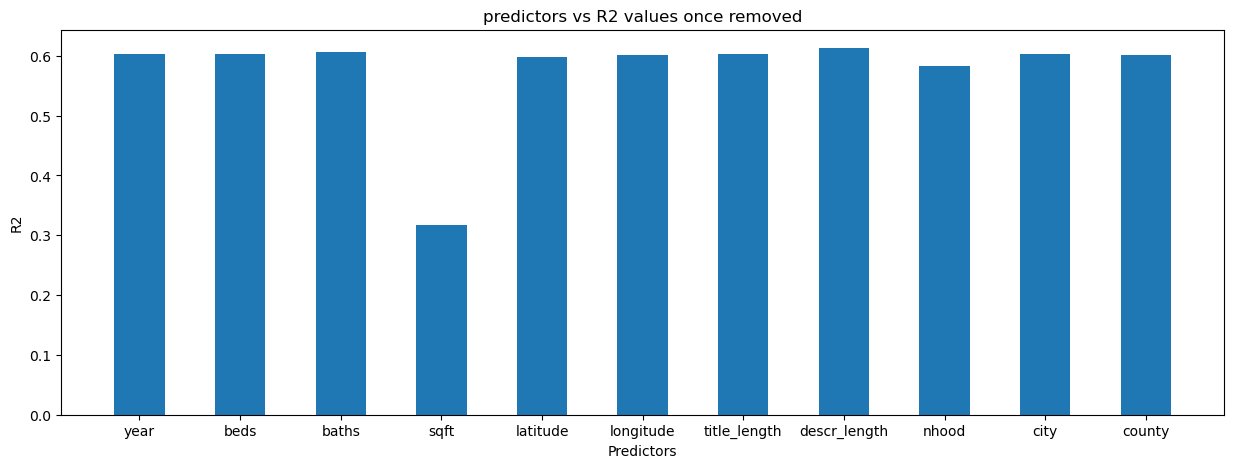

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,5))
plt.bar(predictorsNames, scoresR2, width = 0.5)
plt.xlabel("Predictors")
plt.ylabel("R2")
plt.title("predictors vs R2 values once removed")
plt.show()

<Axes: >

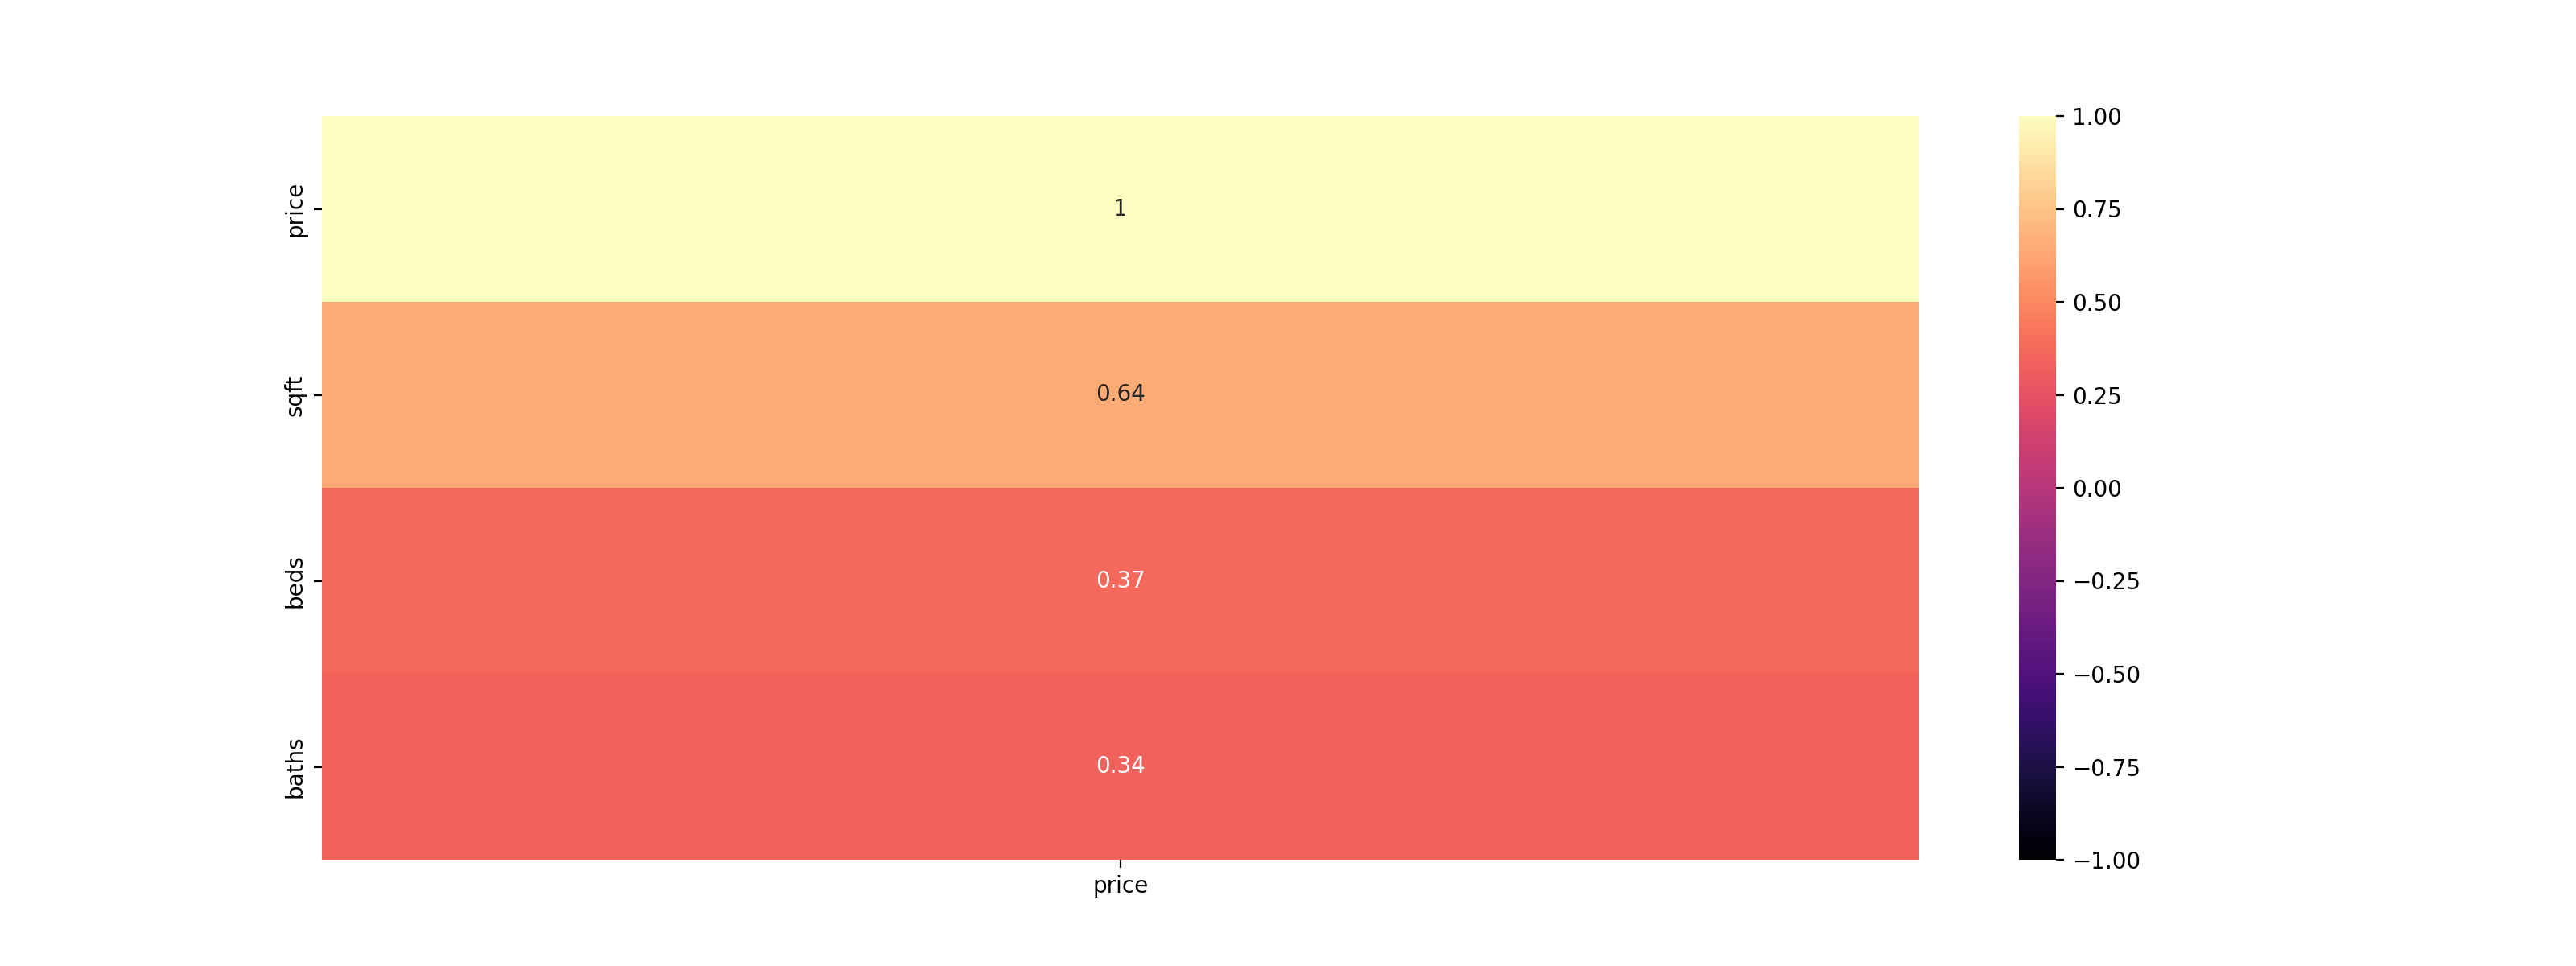

In [56]:
heatmapVar = ['baths','beds','sqft','price']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(df[heatmapVar].corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap='magma')

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['descr'],df['price'], test_size = .2, random_state = 101)

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=cleanText)),
    ('tfidf', TfidfTransformer()),
    #('pre',pre),
    ('LR', LinearRegression())
])

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleanText at 0x000001F51A95FEC0>)),
                ('tfidf', TfidfTransformer()), ('LR', LinearRegression())])

In [40]:
predictions = pipeline.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:
print("MSE: ", mean_squared_error(y_test, predictions))
print("MAE: ", mean_absolute_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2: ", r2_score(y_test, predictions))

MSE:  4216446.843282215
MAE:  1437.4431413243587
RMSE:  2053.3988514855596
R2:  -0.8889702826563561


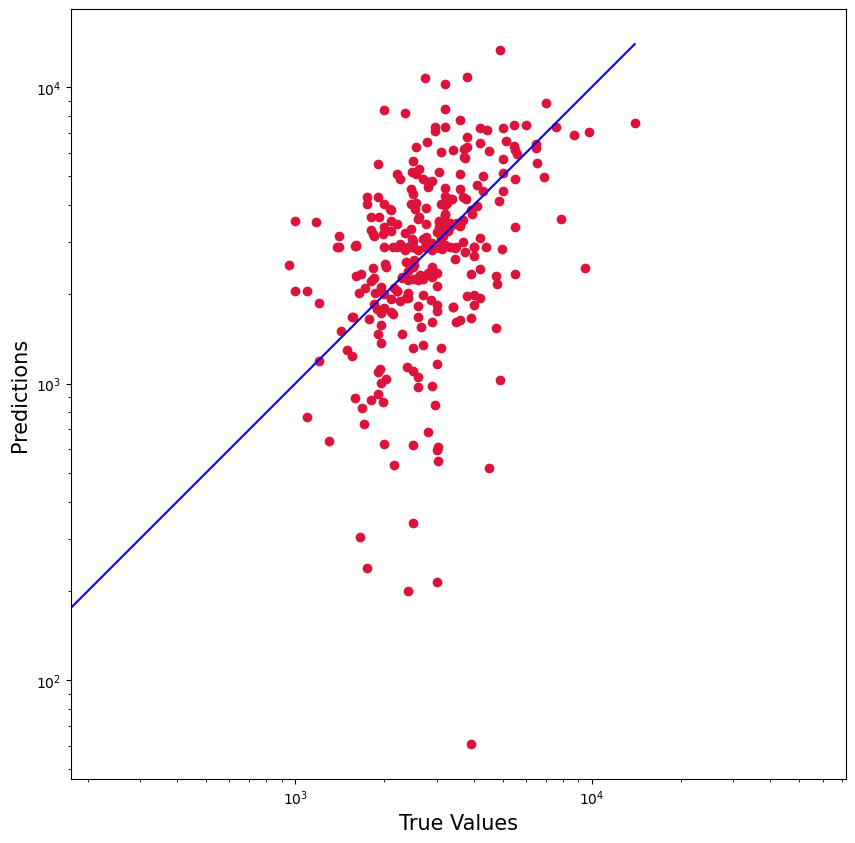

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [44]:
metrics.explained_variance_score(y_test, predictions)

-0.8868591153709089

In [45]:
cv = CountVectorizer()
bow_transformer = CountVectorizer(analyzer = cleanText).fit(df['descr'])
len(bow_transformer.vocabulary_)
descr_bow = bow_transformer.transform(df['descr'])
print("shape of sparse matrix: ", descr_bow.shape)
descr_bow.nnz
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(descr_bow)
descr_tfidf = tfidf_transformer.transform(descr_bow)
print(descr_tfidf)

shape of sparse matrix:  (1534, 22532)
  (0, 21995)	0.18973882765917632
  (0, 21546)	0.07721828176163759
  (0, 21337)	0.13021173167199127
  (0, 21325)	0.16246607730093057
  (0, 21310)	0.12169822178262726
  (0, 21043)	0.0870844459859789
  (0, 20906)	0.04985671296448144
  (0, 20092)	0.0955168439699102
  (0, 19860)	0.10530503052620623
  (0, 19649)	0.13004472854706567
  (0, 19540)	0.05618434352540058
  (0, 19505)	0.10409382801094587
  (0, 19404)	0.1130045420092474
  (0, 19345)	0.0900332148620776
  (0, 19109)	0.054365070255319455
  (0, 18939)	0.12422494940194967
  (0, 18629)	0.12512776624718286
  (0, 18614)	0.10112615225869023
  (0, 17913)	0.08474776616980098
  (0, 17782)	0.15863932872743744
  (0, 17663)	0.08158471957258233
  (0, 17459)	0.06778351032213205
  (0, 17364)	0.11475760385044312
  (0, 17304)	0.09695219904370388
  (0, 17095)	0.06398285184793381
  :	:
  (1533, 6053)	0.06399545095322416
  (1533, 5917)	0.07928400476984132
  (1533, 5803)	0.06538823652287826
  (1533, 5608)	0.06443949844

In [46]:
print(descr_bow.max())

8300


In [47]:
bow_transformer.get_feature_names_out()[8300]

'desire'

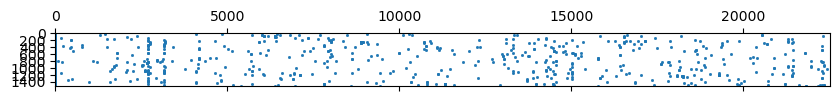

In [48]:

# Implementation of matplotlib spy function 
import matplotlib.pyplot as plt 
import numpy as np 
  

fig = plt.figure(figsize = (10, 1))
plt.spy(descr_tfidf, precision = 0.3, markersize = 1) 

plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [50]:
contin = ['year', 'beds', 'baths','sqft','lat','lon','title_length','descr_length']
X = df.drop(['post_id', 'cleaned_title','details','title','price','date','descr', 'address'], axis =1)
y = df['price']
categorical = ['nhood','city','county']
feats = ['year', 'beds', 'baths','sqft','lat','lon','title_length','descr_length', 'nhood','city','county']

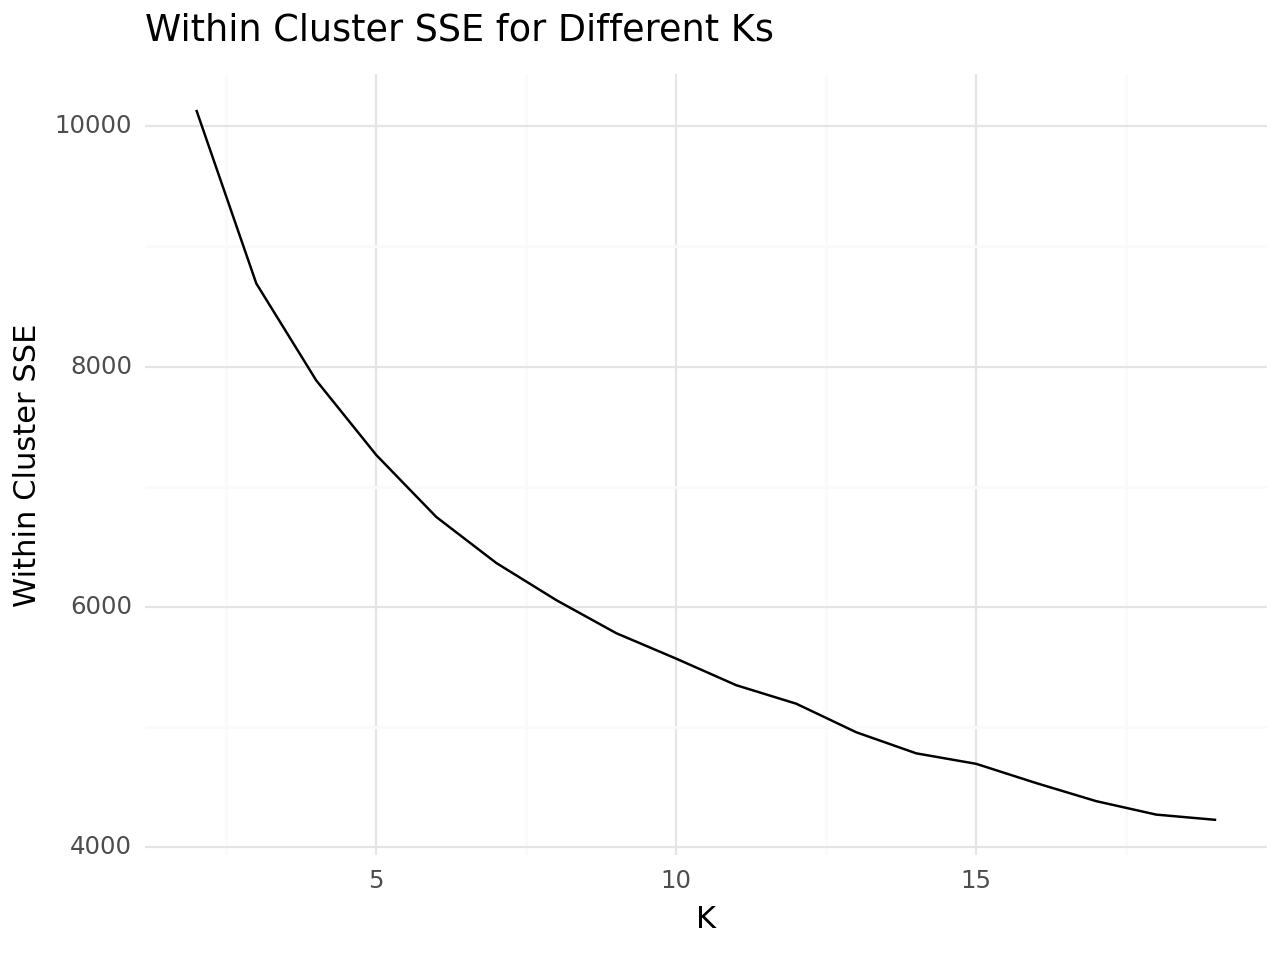

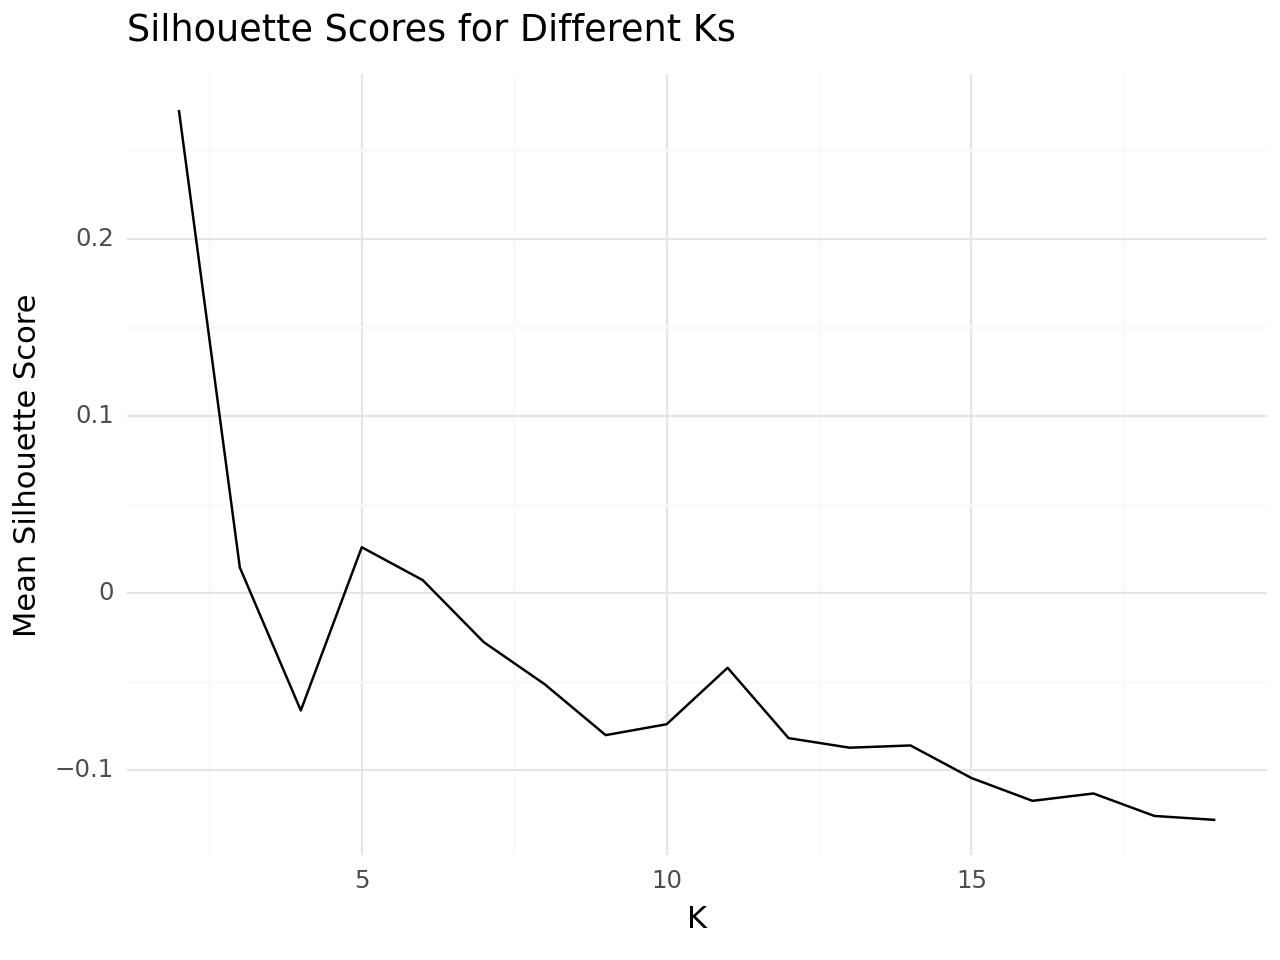

In [51]:
pre = make_column_transformer(
                            (StandardScaler(), contin),
                            remainder = "passthrough"
                            )

metrics = {"SSE": [], "sil": [], "k": []}

for i in range(2,20):
    km = KMeans(i)
    pipe = Pipeline([
        ("pre", pre),
        ("km", km)
    ])
    
    labels = pipe.fit_predict(X[contin])
    sil = silhouette_score(X[contin], labels)
    sse = pipe.named_steps["km"].inertia_

    metrics["SSE"].append(sse)
    metrics["sil"].append(sil)
    metrics["k"].append(i)

newdf = pd.DataFrame(metrics)

print(ggplot(newdf, aes(x = "k", y = "SSE")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Within Cluster SSE",
         title = "Within Cluster SSE for Different Ks"))

print(ggplot(newdf, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

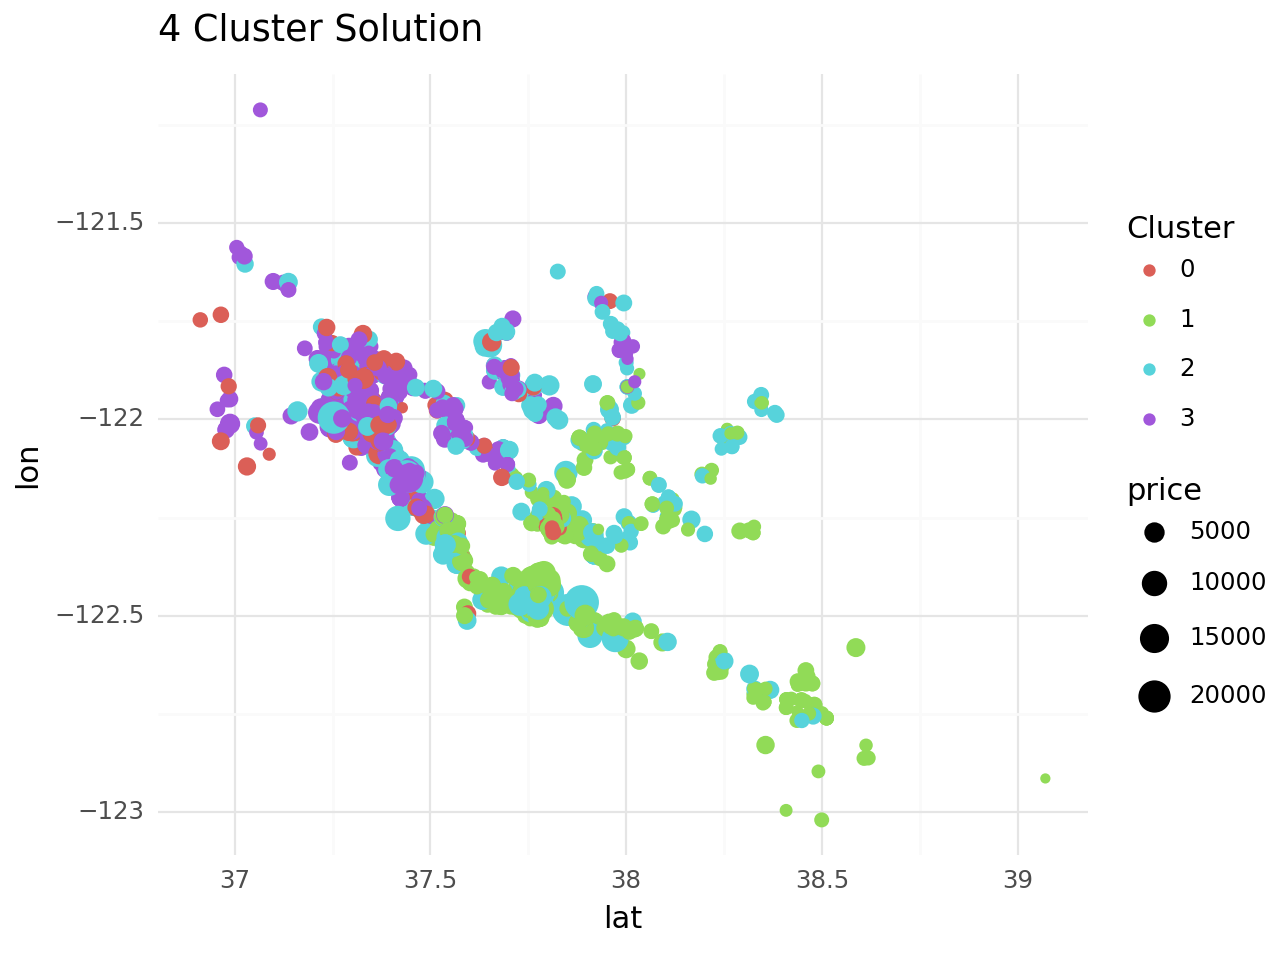

In [52]:
pre = make_column_transformer(
                            (StandardScaler(), contin),
                            (OneHotEncoder(), categorical),
                            remainder = "passthrough"
                            )

km = KMeans(4)
pipe = Pipeline([
      ("pre", pre),
      ("km", km)
])
labels = pipe.fit_predict(X)

df["cluster"] = labels
print(ggplot(df, aes(x = "lat", y = "lon", color = "factor(cluster)")) +
      geom_point(aes(size='price')) +
      theme_minimal() + 
      scale_color_discrete(name = "Cluster") + 
      labs(x = "lat", 
           y = "lon",
           title = "4 Cluster Solution"))

<Axes: >

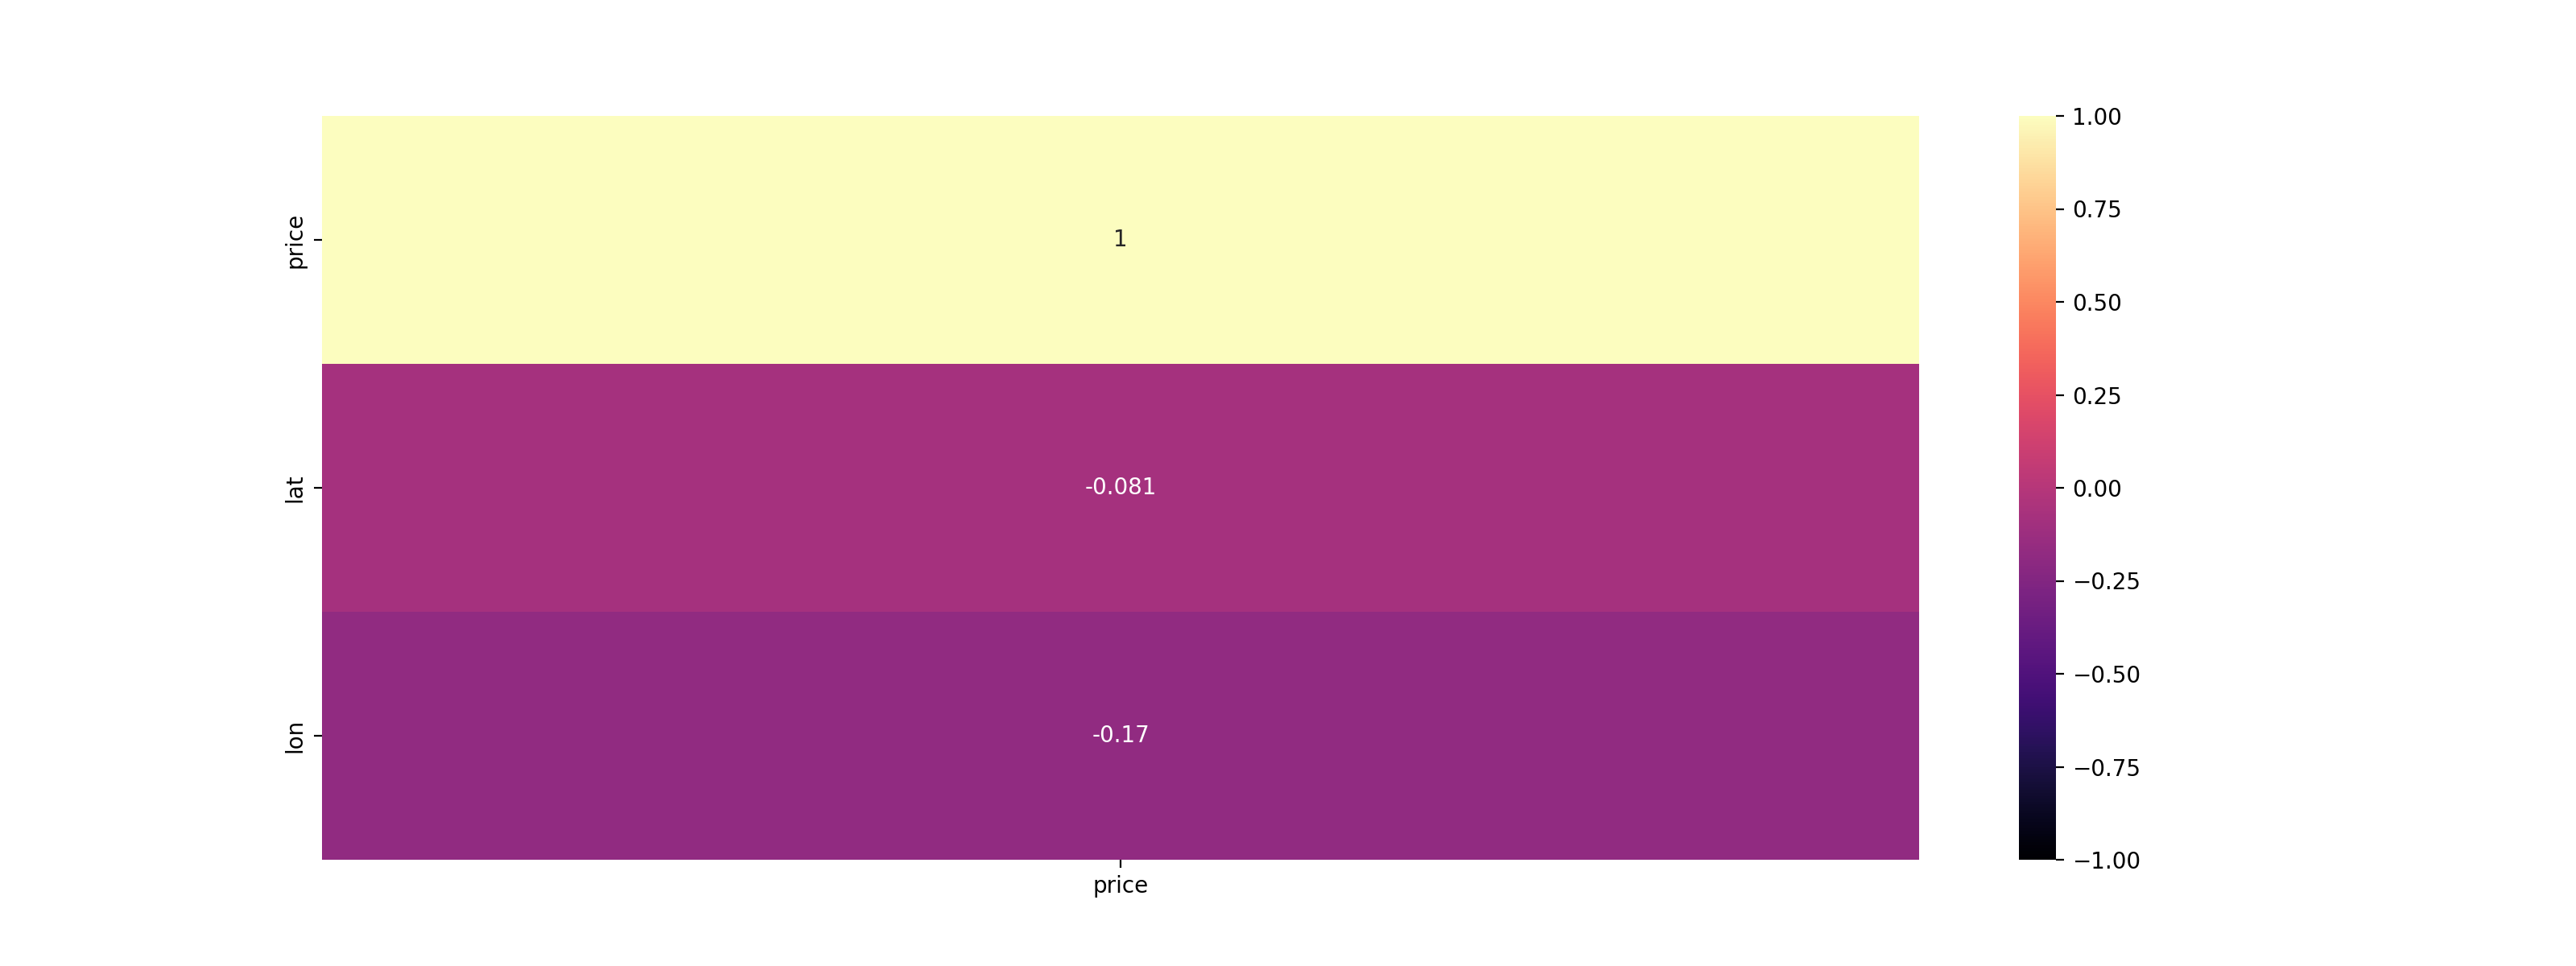

In [53]:
heatmapVar = ['lat','lon','price']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.heatmap(df[heatmapVar].corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap='magma')